In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [69]:
from numpy.random import rand, randn

In [70]:
n, d, k = 100, 2, 2

In [71]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [72]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    part1 = -np.log((2 *np.pi)**(X.shape[1] / 2) * np.sqrt(np.linalg.det(sigma)))
    part2 = (-1 / 2) * (X - mean).T.reshape(-1,1,2) @ np.linalg.inv(sigma) @ (X - mean).reshape(-1,2,1)
    return (part1 * part2).flatten()

In [73]:
print(compute_log_p(X,means[0],sigmas[0]))

[ -0.88462581   5.89306284  -1.50652267   1.40941329  -4.18789613
   2.93557273  -0.18468012   0.63376827 -11.04643495 -10.1444696
   1.42618362  -6.43606528  -0.28831004   0.14431847  -1.20830029
  -0.15673814  -1.17273576   0.23055912   2.09497323  -5.6184791
  -3.01492995  -5.20617718 -11.38375534 -15.36292119  -0.72282878
  -1.64647611   1.27970609   1.02026597   0.37603821  -0.48883479
  -1.44030062   0.32187791   0.87106757   1.89650509  -1.55681216
  -2.06881412  -0.50349251  -3.62043565  -2.35526103  -1.3358868
  -8.35733395  -0.9095741   -0.10400917  -4.07717552  -2.22945431
   0.94455845 -10.96082246   0.92665017   1.65254013  -0.73370867
  -0.52907158  -1.83722878  -7.44147252  -1.91658937  -1.9980458
  -3.63043212   0.80728501   2.1919448    1.94947687  -6.64830564
  -0.68945883  -3.99676715   2.6765484   -0.82159718  -2.08780917
  -0.18973547  -1.60567856   7.17111695   2.39963996  -0.71473772
   0.16194325   2.30236213   5.2545178  -16.53305821  -1.65128369
  -5.3273176  

In [74]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [75]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


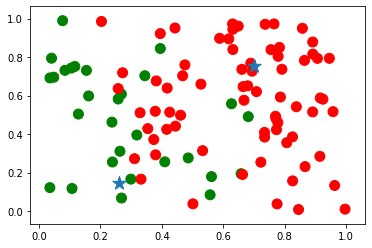

In [76]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()